# Machine Learning Approach

*   **Mohanad Momen Ibrahim**
*   **Khaled Rabbah**
*   **Yousef Tamer**
*   **Habiba Samy**


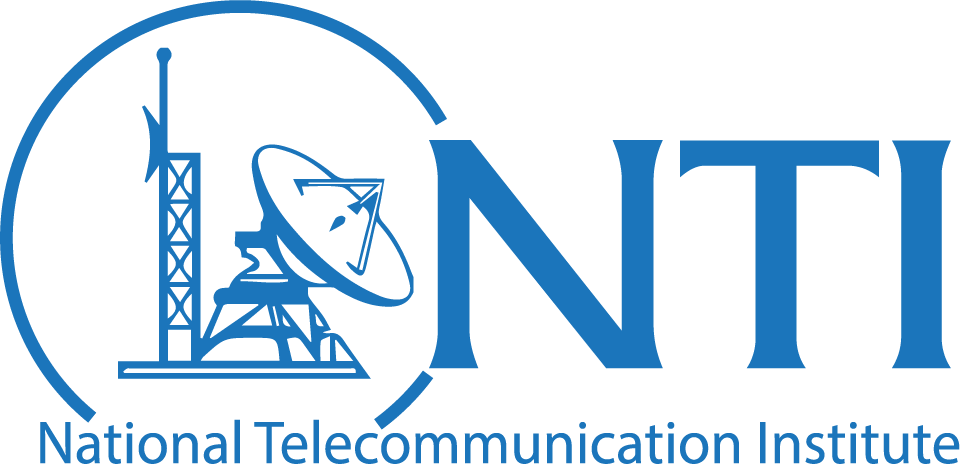


# Import

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , LinearSVC

!pip install catboost
!pip install xgboost

from xgboost import XGBClassifier
from catboost import CatBoostClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


# Donwloading Data Using OpenDataSet


In [6]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000


100%|██████████| 5.20G/5.20G [03:26<00:00, 27.1MB/s]


# Reading The Data

In [6]:
images_df = pd.read_csv("/content/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv")
meta_df = pd.read_csv("/content/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")

print(images_df.columns)
print(meta_df.columns)

# Concatenate side by side
df = pd.concat([meta_df, images_df], axis=1)

print(df.head())
print(df.shape)

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)
Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')
     lesion_id      image_id   dx dx_type   age   sex localization  pixel0000  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp        192   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp         25   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp        192   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp         38   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear        158   

   pixel0001  pixel0002  ...  pixel2343  pixel2344  pixel2345  pixel2346  \
0        1

In [144]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,pixel0000,pixel0001,pixel0002,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,192,153,193,...,173,124,138,183,147,166,185,154,177,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,25,14,30,...,60,39,55,25,14,28,25,14,27,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,192,138,153,...,167,129,143,159,124,142,136,104,117,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,38,19,30,...,44,26,36,25,12,17,25,12,15,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,158,113,139,...,209,166,185,172,135,149,109,78,92,2


# **Another Method**

In [137]:
base_skin_dir = '/content/skin-cancer-mnist-ham10000'

In [138]:
import os
from glob import glob

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [141]:
df['path'] = df['image_id'].map(imageid_path_dict.get)


df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,pixel0000,pixel0001,pixel0002,...,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,192,153,193,...,124,138,183,147,166,185,154,177,2,/content/skin-cancer-mnist-ham10000/HAM10000_i...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,25,14,30,...,39,55,25,14,28,25,14,27,2,/content/skin-cancer-mnist-ham10000/HAM10000_i...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,192,138,153,...,129,143,159,124,142,136,104,117,2,/content/skin-cancer-mnist-ham10000/HAM10000_i...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,38,19,30,...,26,36,25,12,17,25,12,15,2,/content/skin-cancer-mnist-ham10000/HAM10000_i...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,158,113,139,...,166,185,172,135,149,109,78,92,2,/content/skin-cancer-mnist-ham10000/ham10000_i...


In [ ]:
# Metadata features
X_meta = df[["age", "sex", "localization"]]

# Function to load + preprocess image
def load_image(path, size=(32, 32)):
    img = cv2.imread(path)
    img = cv2.resize(img, size)
    img = img.flatten()
    return img

# Convert all images into numeric arrays
X_img = np.array([load_image(p) for p in df["path"]])

# Combine metadata + images
X = np.hstack([X_meta.values, X_img])
y = df["dx_label"]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2360 entries, lesion_id to label
dtypes: float64(1), int64(2353), object(6)
memory usage: 180.3+ MB


# Data Preprocessing

In [85]:
df.isna().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
...,...
pixel2348,0
pixel2349,0
pixel2350,0
pixel2351,0


In [53]:
#meta_df['age'].fillna((meta_df['age'].mean()), inplace=True)
# there is missing values with gender(sex) , thus we can't fill with mean

In [86]:
df.drop(['lesion_id','image_id'],axis=1,inplace=True)
df.dropna(inplace=True);
df.drop_duplicates(inplace=True);

In [87]:
df.duplicated().sum()


np.int64(0)

In [88]:
df.isna().sum().sum()

np.int64(0)

In [89]:
df

,dx,dx_type,age,sex,localization,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,bkl,histo,80.0,male,scalp,192,153,193,195,155,...,173,124,138,183,147,166,185,154,177,2
1,bkl,histo,80.0,male,scalp,25,14,30,68,48,...,60,39,55,25,14,28,25,14,27,2
2,bkl,histo,80.0,male,scalp,192,138,153,200,145,...,167,129,143,159,124,142,136,104,117,2
3,bkl,histo,80.0,male,scalp,38,19,30,95,59,...,44,26,36,25,12,17,25,12,15,2
4,bkl,histo,75.0,male,ear,158,113,139,194,144,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,akiec,histo,40.0,male,abdomen,183,165,181,182,165,...,208,185,187,208,186,186,206,187,189,0
10011,akiec,histo,40.0,male,abdomen,2,3,1,38,33,...,96,79,76,24,23,21,3,4,1,0
10012,akiec,histo,40.0,male,abdomen,132,118,118,167,149,...,204,181,178,181,159,153,172,151,145,0
10013,akiec,histo,80.0,male,face,160,124,146,164,131,...,185,162,167,184,157,166,185,162,172,0


In [7]:
#!pip install ydata-profiling
from ydata_profiling import ProfileReport

df_partial = df[['dx', 'dx_type', 'age', 'sex', 'localization']]

profile = ProfileReport(df_partial, title="Metadata Profiling Report", explorative=True)


profile.to_notebook_iframe()


#No duplicates

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 13.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
df = df[df['sex'] != 'unknown']


In [94]:
df.head()

,dx,dx_type,age,sex,localization,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,bkl,histo,80.0,male,scalp,192,153,193,195,155,...,173,124,138,183,147,166,185,154,177,2
1,bkl,histo,80.0,male,scalp,25,14,30,68,48,...,60,39,55,25,14,28,25,14,27,2
2,bkl,histo,80.0,male,scalp,192,138,153,200,145,...,167,129,143,159,124,142,136,104,117,2
3,bkl,histo,80.0,male,scalp,38,19,30,95,59,...,44,26,36,25,12,17,25,12,15,2
4,bkl,histo,75.0,male,ear,158,113,139,194,144,...,209,166,185,172,135,149,109,78,92,2


In [95]:
# Encode target column
le_dx = LabelEncoder()
df["dx_label"] = le_dx.fit_transform(df["dx"])

# Encode 'sex' and 'localization'
for col in ["sex", "localization"]:
    df[col] = LabelEncoder().fit_transform(df[col])

/tmp/ipython-input-1432335176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx_label"] = le_dx.fit_transform(df["dx"])
/tmp/ipython-input-1432335176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna("unknown")
/tmp/ipython-input-1432335176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [127]:
import numpy as np

# Metadata features
X_meta = df[["age", "sex", "localization"]]

# One-hot encode categorical features (sex, localization)
X_meta = pd.get_dummies(X_meta, drop_first=True)

# Image features (already in CSV)
pixel_cols = [col for col in df.columns if col.startswith("pixel")]
X_img = df[pixel_cols].values.astype("float32") / 255.0  # Normalize pixels

# Combine metadata + images
X = np.hstack([X_meta.values, X_img])

# Target variable
y = df["dx_label"]


In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Models

In [129]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\n===== Random Forest =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== Random Forest =====
Accuracy: 0.7306532663316583
              precision    recall  f1-score   support

       akiec       0.48      0.23      0.31        66
         bcc       0.57      0.36      0.44       103
         bkl       0.47      0.33      0.39       218
          df       0.00      0.00      0.00        23
         mel       0.58      0.18      0.27       222
          nv       0.77      0.97      0.86      1330
        vasc       0.00      0.00      0.00        28

    accuracy                           0.73      1990
   macro avg       0.41      0.29      0.32      1990
weighted avg       0.68      0.73      0.68      1990



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\n===== KNN =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== KNN =====
Accuracy: 0.6989949748743719
              precision    recall  f1-score   support

       akiec       0.37      0.20      0.26        66
         bcc       0.38      0.31      0.34       103
         bkl       0.39      0.37      0.38       218
          df       0.00      0.00      0.00        23
         mel       0.38      0.09      0.15       222
          nv       0.78      0.93      0.85      1330
        vasc       0.50      0.07      0.12        28

    accuracy                           0.70      1990
   macro avg       0.40      0.28      0.30      1990
weighted avg       0.65      0.70      0.65      1990



In [130]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("\n===== Naive Bayes =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== Naive Bayes =====
Accuracy: 0.40804020100502514
              precision    recall  f1-score   support

       akiec       0.15      0.24      0.18        66
         bcc       0.18      0.43      0.25       103
         bkl       0.26      0.40      0.32       218
          df       0.03      0.17      0.06        23
         mel       0.32      0.35      0.33       222
          nv       0.92      0.43      0.59      1330
        vasc       0.02      0.21      0.03        28

    accuracy                           0.41      1990
   macro avg       0.27      0.32      0.25      1990
weighted avg       0.70      0.41      0.49      1990



In [102]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("\n===== XGBoost =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:59:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
Accuracy: 0.7648241206030151
              precision    recall  f1-score   support

       akiec       0.48      0.35      0.40        66
         bcc       0.60      0.45      0.51       103
         bkl       0.49      0.44      0.46       218
          df       0.43      0.13      0.20        23
         mel       0.56      0.32      0.41       222
          nv       0.83      0.96      0.89      1330
        vasc       1.00      0.25      0.40        28

    accuracy                           0.76      1990
   macro avg       0.63      0.41      0.47      1990
weighted avg       0.74      0.76      0.74      1990



In [103]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\n===== Decision Tree =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== Decision Tree =====
Accuracy: 0.6381909547738693
              precision    recall  f1-score   support

       akiec       0.14      0.11      0.12        66
         bcc       0.21      0.22      0.22       103
         bkl       0.36      0.38      0.37       218
          df       0.07      0.09      0.08        23
         mel       0.25      0.27      0.26       222
          nv       0.83      0.82      0.83      1330
        vasc       0.20      0.21      0.21        28

    accuracy                           0.64      1990
   macro avg       0.30      0.30      0.30      1990
weighted avg       0.64      0.64      0.64      1990



In [104]:
# SVM
svm = SVC(kernel="linear", probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("\n===== SVM =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== SVM =====
Accuracy: 0.6522613065326633
              precision    recall  f1-score   support

       akiec       0.32      0.41      0.36        66
         bcc       0.38      0.43      0.40       103
         bkl       0.34      0.43      0.38       218
          df       0.07      0.13      0.09        23
         mel       0.31      0.26      0.28       222
          nv       0.85      0.80      0.82      1330
        vasc       0.47      0.54      0.50        28

    accuracy                           0.65      1990
   macro avg       0.39      0.43      0.40      1990
weighted avg       0.67      0.65      0.66      1990



In [133]:
# LinearSVC (faster than SVC for high-dimensional data)
linear_svc = LinearSVC(random_state=42, max_iter=5000)
linear_svc.fit(X_train, y_train)

# Predict
y_pred = linear_svc.predict(X_test)

print("\n===== LinearSVC =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== LinearSVC =====
Accuracy: 0.7040201005025125
              precision    recall  f1-score   support

       akiec       0.32      0.21      0.25        66
         bcc       0.42      0.35      0.38       103
         bkl       0.39      0.31      0.35       218
          df       0.29      0.09      0.13        23
         mel       0.34      0.20      0.25       222
          nv       0.80      0.92      0.86      1330
        vasc       0.35      0.25      0.29        28

    accuracy                           0.70      1990
   macro avg       0.42      0.33      0.36      1990
weighted avg       0.66      0.70      0.67      1990



In [105]:

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("\n===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== Logistic Regression =====
Accuracy: 0.7050251256281407
              precision    recall  f1-score   support

       akiec       0.23      0.17      0.19        66
         bcc       0.40      0.37      0.38       103
         bkl       0.40      0.40      0.40       218
          df       0.14      0.09      0.11        23
         mel       0.38      0.20      0.27       222
          nv       0.82      0.91      0.86      1330
        vasc       0.48      0.46      0.47        28

    accuracy                           0.71      1990
   macro avg       0.41      0.37      0.38      1990
weighted avg       0.67      0.71      0.68      1990



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
# CatBoost
cat = CatBoostClassifier(verbose=0, random_seed=42)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print("\n===== CatBoost =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))


===== CatBoost =====
Accuracy: 0.7653266331658292
              precision    recall  f1-score   support

       akiec       0.48      0.33      0.39        66
         bcc       0.59      0.53      0.56       103
         bkl       0.51      0.45      0.48       218
          df       0.67      0.09      0.15        23
         mel       0.57      0.34      0.43       222
          nv       0.83      0.95      0.89      1330
        vasc       1.00      0.18      0.30        28

    accuracy                           0.77      1990
   macro avg       0.66      0.41      0.46      1990
weighted avg       0.75      0.77      0.74      1990



In [110]:
# Define base learners
base_learners = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
]


stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=3,
    n_jobs=1
)


# Train stack model
stack_model.fit(X_train, y_train)

# Evaluate
y_pred = stack_model.predict(X_test)
print("Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_dx.classes_))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:12:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages

Stacked Model Accuracy: 0.7673366834170854
              precision    recall  f1-score   support

       akiec       0.49      0.35      0.41        66
         bcc       0.64      0.52      0.58       103
         bkl       0.50      0.46      0.48       218
          df       0.60      0.13      0.21        23
         mel       0.55      0.35      0.43       222
          nv       0.84      0.95      0.89      1330
        vasc       1.00      0.29      0.44        28

    accuracy                           0.77      1990
   macro avg       0.66      0.43      0.49      1990
weighted avg       0.75      0.77      0.75      1990



# Model Export

In [135]:
import joblib

models = {
    "RandomForest": rf,
    "KNN": knn,
    "NaiveBayes": nb,
    "XGBoost": xgb,
    "DecisionTree": dt,
    "SVM": svm,
    "LinearSVC": linear_svc,
    "LogisticRegression": lr,
    "CatBoost": cat,
    "StackedModel": stack_model,
    "XGBoost_PCA_Scaled_Weighted": xgb_model,
}

for name, model in models.items():
    filename = f"{name}_model.pkl"
    joblib.dump(model, filename)
    print(f"{name} model exported successfully to {filename}!")

RandomForest model exported successfully to RandomForest_model.pkl!
KNN model exported successfully to KNN_model.pkl!
NaiveBayes model exported successfully to NaiveBayes_model.pkl!
XGBoost model exported successfully to XGBoost_model.pkl!
DecisionTree model exported successfully to DecisionTree_model.pkl!
SVM model exported successfully to SVM_model.pkl!
LinearSVC model exported successfully to LinearSVC_model.pkl!
LogisticRegression model exported successfully to LogisticRegression_model.pkl!
CatBoost model exported successfully to CatBoost_model.pkl!
StackedModel model exported successfully to StackedModel_model.pkl!
XGBoost_PCA_Scaled_Weighted model exported successfully to XGBoost_PCA_Scaled_Weighted_model.pkl!
